In [0]:
## https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
def download_data(a,d):  
  import requests
  def download_file_from_google_drive(id, destination):
      URL = "https://docs.google.com/uc?export=download"

      session = requests.Session()

      response = session.get(URL, params = { 'id' : id }, stream = True)
      token = get_confirm_token(response)

      if token:
          params = { 'id' : id, 'confirm' : token }
          response = session.get(URL, params = params, stream = True)

      save_response_content(response, destination)    

  def get_confirm_token(response):
      for key, value in response.cookies.items():
          if key.startswith('download_warning'):
              return value

      return None

  def save_response_content(response, destination):
      CHUNK_SIZE = 32768

      with open(destination, "wb") as f:
          for chunk in response.iter_content(CHUNK_SIZE):
              if chunk: # filter out keep-alive new chunks
                  f.write(chunk)
  download_file_from_google_drive(a,d)

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import operator
import re
nltk.download('tagsets')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
#RESEARCH QUESTION 1
def labels(review,rating):
  def lr(data):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    import pandas as pd
    
    X_train=data1.iloc[:,:-1]
    y_train=data1.iloc[:,-1]
    LR = LogisticRegression(solver='lbfgs',random_state=43,max_iter=1000)
    LR.fit(X_train,y_train)
    return LR.predict(data.iloc[:,:])

  from nltk.tokenize import sent_tokenize,word_tokenize
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  import nltk
  from nltk.data import load
  import numpy as np

  ## Features
  tagdict = load('help/tagsets/upenn_tagset.pickle')
  sid = SentimentIntensityAnalyzer()
  POS,length,avg_word_len,num_sent,avg_sent_len,positive_percent,neg_percent,bi,uni={},[],[],[],[],[],[],{},{}
  import pandas as pd
  dat=pd.DataFrame()
  for i in POS:
    dat[i]=POS[i]
  for i in tagdict.keys():
    POS['POS_'+i]=[]

  # a='1-pNvy5k7PTivT7qql-wN7PzEZvHa076c'
  # d='data.csv'
  # download_data(a,d) 
  global data1   
  data1 = pd.read_csv('data.csv')
  bigram,unigram=[],[]
  for i in data1.columns:
      if 'bigram_' in i:
          bigram.append(i[i.index('_')+1:])
      elif 'unigram_' in i:
          unigram.append(i[i.index('_')+1:])

  for j in bigram:
    bi['bigram_'+j]=[0]*len(review)

  for j in unigram:
    uni['unigram_'+j]=[0]*len(review)

  dummy_index=0
  for i in review:
    length.append(len(i))
    
    ad=[len(z) for z in i.split(" ")]
    avg_word_len.append(sum(ad)/len(ad))
    
    a= i.split(" ")
    positive_percent.append(len([s for s in a if sid.polarity_scores(s)['compound']>0])/len(i))
    neg_percent.append(len([s for s in a if sid.polarity_scores(s)['compound']<0])/len(i))
    
    num_sent.append(len(sent_tokenize(i)))
    
    avg_sent_len.append(sum(len(word_tokenize(z)) for z in sent_tokenize(i))/len(sent_tokenize(i)))
    
    tags = nltk.pos_tag(nltk.word_tokenize(i))
    t=[]
    for j in tags:
      t.append(j[1])
    for j in tagdict.keys():
      if j in np.unique(np.array(t)):
        POS['POS_'+j].append(t.count(j)/len(t))
      else:
        POS['POS_'+j].append(0)

    for j in bigram:
      if j in i:
        bi['bigram_'+j][dummy_index]=1

    for j in unigram:
      if j in i:
        uni['unigram_'+j][dummy_index]=1
    dummy_index+=1

  #Dataset generation
  import pandas as pd
  data=pd.DataFrame()
  data['rating']=rating
  data['length of the review']=length
  data['average word length']=avg_word_len
  data['number of sentences']=num_sent
  data['average sentence length']=avg_sent_len
  for i in POS:
    data[i]=POS[i]
  data['positive %']=positive_percent
  data['negative %']=neg_percent
  for i in uni:
    data[i]=uni[i]
  for i in bi:
    data[i]=bi[i]
  
  return lr(data)

In [0]:
import pandas as pd

a = '1OFdvfM4OnBdWG0n4ZQ0DTWtA9Fsv3W4o'
d = 'dataset3_nolabels.csv'
download_data(a,d)
rev = pd.read_csv("dataset3_nolabels.csv")
rev = rev.drop(['Unnamed: 0'],axis=1)

rev.head()

,business_id,res_name,date,text,stars
0,AEx2SYEUJmTxVVB18LlCwA,Wilensky's,2016-05-28,Super simple place but amazing nonetheless. It...,5.0
1,VR6GpWIda3SfvPC-lg9H3w,Tuck Shop,2016-05-28,Small unassuming place that changes their menu...,5.0
2,CKC0-MOWMqoeWf6s-szl8g,Lester's Deli,2016-05-28,Lester's is located in a beautiful neighborhoo...,5.0
3,ACFtxLv8pGrrxMm6EgjreA,Five Guys,2016-05-28,Love coming here. Yes the place always needs t...,4.0
4,s2I_Ni76bjJNK9yG60iD-Q,Maison Christian Faure,2016-05-28,Had their chocolate almond croissant and it wa...,4.0


In [0]:
#labelling each review using Research Question1 Model
review = rev['text'].tolist()
rating = rev['stars'].tolist()
label = labels(review,rating)
rev['label'] = label

#assigning polarity to each of the reviews
rev['polarity'] = ''
sia = SentimentIntensityAnalyzer()
for i,row in rev.iterrows():
    sentence = row['text']
    s = sia.polarity_scores(sentence)
    row['polarity'] = s['compound']
rev.to_csv('dataset3_wlabels.csv')

In [0]:
import pandas as pd
a = '1oESEoz1xJBdvpy_YOhSHEnFxrWsSgp3V'
d = 'dataset3_wlabels.csv'
download_data(a,d)
rev = pd.read_csv('dataset3_wlabels.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
rev = rev.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
rev.head()

,business_id,res_name,date,text,stars,label,polarity
0,AEx2SYEUJmTxVVB18LlCwA,Wilensky's,2016-05-28,Super simple place but amazing nonetheless. It...,5.0,1.0,0.9551
1,VR6GpWIda3SfvPC-lg9H3w,Tuck Shop,2016-05-28,Small unassuming place that changes their menu...,5.0,1.0,0.8167
2,CKC0-MOWMqoeWf6s-szl8g,Lester's Deli,2016-05-28,Lester's is located in a beautiful neighborhoo...,5.0,1.0,0.6249
3,ACFtxLv8pGrrxMm6EgjreA,Five Guys,2016-05-28,Love coming here. Yes the place always needs t...,4.0,1.0,0.8560
4,s2I_Ni76bjJNK9yG60iD-Q,Maison Christian Faure,2016-05-28,Had their chocolate almond croissant and it wa...,4.0,1.0,0.8313


In [0]:
import matplotlib.pyplot as plt

def trend(res,view,mon_year='2016'):
    p_score = {}
    score = {}
    d = {}
    
    if view == 'year':
      years = [str(y) for y in range(2006,2018)]
      p_score = dict.fromkeys(years,0)
      d = dict.fromkeys(years,0)
      for i,row in rev.iterrows():
          if row['res_name'] == res and row['label']==1:
            for y in years:
              if re.search(y, row['date']):
                p_score[y] += row['polarity']
                d[y] += 1
      for y in years:
        if d[y] == 0:
          score[y] = 0
        else:
          score[y] = p_score[y]/d[y]
      plt.xlabel('Year View')
      plt.ylabel('Popularity Score')
      plt.title('Popularity of Restaurant '+res+' over the Years')
      dates = list(score.keys())          
      trend = list(score.values())        
      plt.plot_date(dates, trend, '-')
    
    elif view == 'month':
      months = ['0'+str(m) for m in range(1,12) if m<10]
      months.extend(['10','11','12'])
      p_score = dict.fromkeys(months,0)
      d = dict.fromkeys(months,0)
      for i,row in rev.iterrows():
        if row['res_name'] == res and row['label']==1:
          for m in months:
            if re.search(str(mon_year)+'-'+ m, row['date']): 
                p_score[m] += row['polarity']
                d[m] += 1
      for m in months:
        if d[m] == 0:
          score[m] = 0
        else:
          score[m] = p_score[m]/d[m]
      plt.xlabel('Month View')
      plt.ylabel('Popularity Score')
      plt.title('Popularity of Restaurant '+res+' over the Months for the year:'+mon_year)
      dates = list(score.keys())          
      trend = list(score.values())        
      plt.plot_date(dates, trend, '-')
      
    elif view == 'quarter':
      months = ['0'+str(m) for m in range(1,12) if m<10]
      months.extend(['10','11','12'])
      quart = {'1st quarter':['01','02','03'],'2nd quarter':['04','05','06'],'3rd quarter':['07','08','09'],'4th quarter':['10','11','12']}
      p_score = dict.fromkeys(quart.keys(),0)
      d = dict.fromkeys(quart.keys(),0)
      for i,row in rev.iterrows():
        if row['res_name'] == res and row['label']==1:
          for m in months:
            if re.search(str(mon_year)+'-'+ m, row['date']): 
              for k,v in quart.items():
                if m in v: 
                  p_score[k] += row['polarity']
                  d[k] += 1
      for k in quart:
        if d[k] == 0:
          score[k] = 0
        else:
          score[k] = p_score[k]/d[k]
      plt.xlabel('Quarter View')
      plt.ylabel('Popularity Score')
      plt.title('Popularity of Restaurant '+res+' over the Quarters for the year:'+mon_year)
      dates = list(score.keys())          
      trend = list(score.values())        
      plt.plot_date(dates, trend, '-')
  

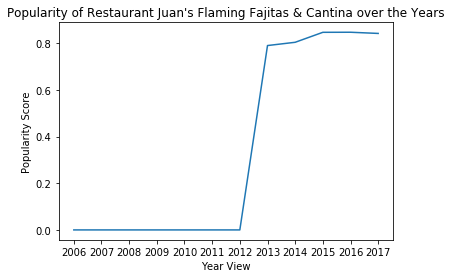

In [0]:
trend("Juan's Flaming Fajitas & Cantina","year")

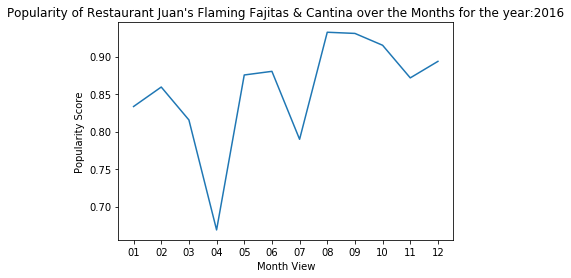

In [0]:
trend("Juan's Flaming Fajitas & Cantina","month")

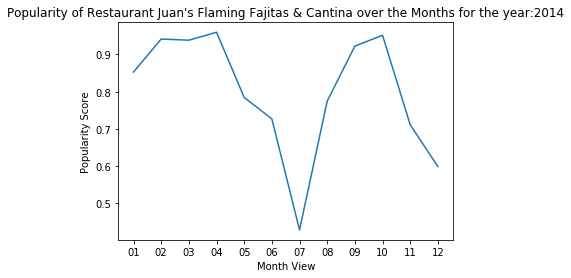

In [0]:
trend("Juan's Flaming Fajitas & Cantina","month","2014")

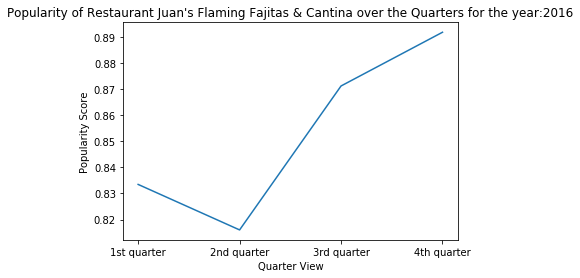

In [0]:
trend("Juan's Flaming Fajitas & Cantina","quarter")